In [105]:
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [184]:
def posterior(mu,Sigma,x):
    X = np.array([x,1])
    sn = np.linalg.inv(((sigma**2)*np.eye(2)+sigma**(-2)*np.dot(X,X)))
    mn = np.dot(sn,((sigma**2)*np.dot(np.eye(2),mu)+(sigma**(-2))*np.array([[X[0]],[X[1]]])))
    
    return norm.pdf(mn,sn),sn,mn

In [185]:
#parameters to generate data
w0 = 0.3
w1 = -1.5

In [186]:
#generate some data
x_pts = np.linspace(-1,1,199)
y_pts = np.ones(199)
for i in range(199):
    y_pts[i] = w1*x[i]+w0+np.random.normal(0,0.03)

In [187]:
#now lets define our prior
priormu = np.array([0,0])
sigma = 1
priorSigma = np.eye(2)

#p(w) = normal(priormu,priorSigma)
prior_w = norm.pdf(priormu,priorSigma)

In [188]:
#we have derived the posterior
#sn = np.linalg.inv(((sigma**2)*np.eye(2)+sigma**(-2)*np.dot(X,X)))
#mn = np.dot(sn,((sigma**2)*np.dot(np.eye(2),mu)+(sigma**(-2))*X))
#posterior_w = norm.pdf(sn,mn)

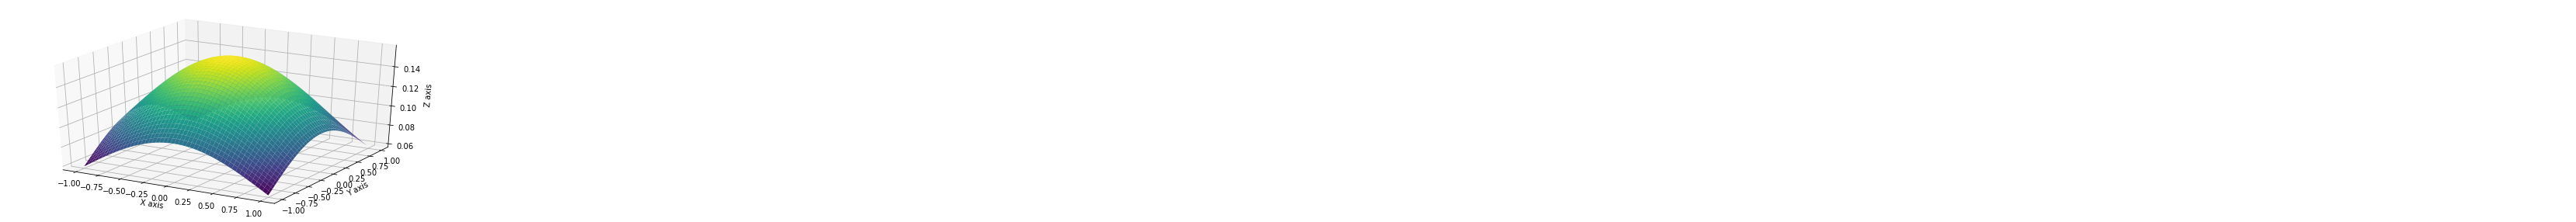

In [189]:
#Create grid and multivariate normal
X, Y = np.meshgrid(x_pts,x_pts)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(priormu, priorSigma)

#Make a 3D plot
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

(array([[0.11092083, 0.3332246 ],
       [0.14972747, 0.36827014]]), array([[ 0.6, -0.4],
       [-0.4,  0.6]]), array([[-1.],
       [ 1.]]))
(array([[0.11185643, 0.33427295],
       [0.15074427, 0.36897988]]), array([[ 0.60081052, -0.39918948],
       [-0.39918948,  0.60081052]]), array([[-0.99393121],
       [ 0.99596778]]))
(array([[0.11279889, 0.33531764],
       [0.15176197, 0.36968063]]), array([[ 0.60162585, -0.39837415],
       [-0.39837415,  0.60162585]]), array([[-0.98784594],
       [ 0.99195204]]))


Text(0, 0.5, '$p(\\mu|\\mathbf{x})$')

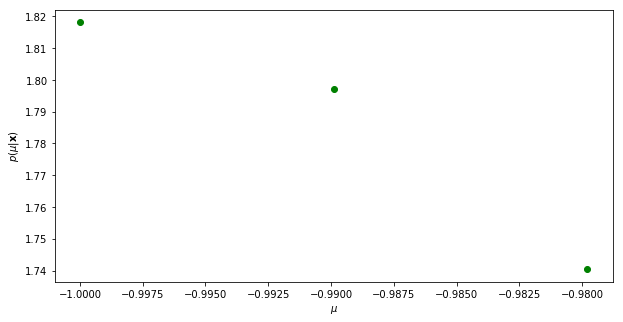

In [191]:
# create figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for i in range(3):
    # plot prior
    ax.plot(x_pts[i],y_pts[i],'go')
    post = posterior(mu,sigma,x_pts[i])
    sigma =
    mu = post[2]
    #ax.fill_between(mu_test,prior_mu,color='green',alpha=0.3)
    


ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')